In [ ]:
#Import The Necessaary Library 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

**Step-1-Load the Dataset**

In [ ]:
#Load the Dataset
data=pd.read_csv('/content/drive/My Drive/project/Dataset/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
data.shape

(398, 9)

In [ ]:
data.keys()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

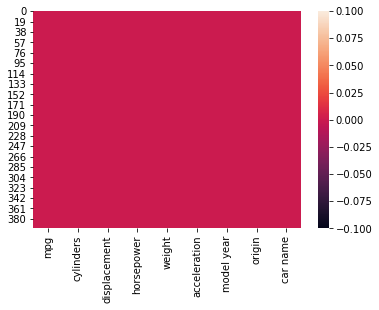

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data = data[data.horsepower != '?']
print('?' in data.horsepower)

False


In [ ]:
data.shape

(392, 9)

In [ ]:
data["horsepower"] = pd.to_numeric(data["horsepower"])

In [ ]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['car name'], dtype='object')

In [ ]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['cylinders', 'horsepower', 'weight', 'model year', 'origin'], dtype='object')

In [ ]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['mpg', 'displacement', 'acceleration'], dtype='object')

In [ ]:
#Describe the dataset Column Value 
data[Numerical].describe()

,cylinders,horsepower,weight,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,104.469388,2977.584184,75.979592,1.576531
std,1.705783,38.491160,849.402560,3.683737,0.805518
min,3.000000,46.000000,1613.000000,70.000000,1.000000
25%,4.000000,75.000000,2225.250000,73.000000,1.000000
50%,4.000000,93.500000,2803.500000,76.000000,1.000000
75%,8.000000,126.000000,3614.750000,79.000000,2.000000
max,8.000000,230.000000,5140.000000,82.000000,3.000000


In [ ]:
#Describe the dataset Column Value 
data[Float].describe()

,mpg,displacement,acceleration
count,392.000000,392.000000,392.000000
mean,23.445918,194.411990,15.541327
std,7.805007,104.644004,2.758864
min,9.000000,68.000000,8.000000
25%,17.000000,105.000000,13.775000
50%,22.750000,151.000000,15.500000
75%,29.000000,275.750000,17.025000
max,46.600000,455.000000,24.800000


**step-2-Pre-Process the Dataset**

In [ ]:
data["car name"].value_counts()

amc matador                  5
ford pinto                   5
toyota corolla               5
peugeot 504                  4
amc hornet                   4
                            ..
datsun 200-sx                1
vw dasher (diesel)           1
vw pickup                    1
chevrolet nova custom        1
pontiac catalina brougham    1
Name: car name, Length: 301, dtype: int64

In [ ]:
model=[]
for x in data["car name"]:
    x = x.split()
    model.append(x[0])

In [ ]:
data["manufacturer"] = model

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [ ]:
data["manufacturer"].value_counts()

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
vw                6
chrysler          6
volvo             6
saab              4
opel              4
subaru            4
chevy             3
renault           3
maxda             2
mercedes-benz     2
cadillac          2
bmw               2
nissan            1
vokswagen         1
toyouta           1
capri             1
triumph           1
hi                1
chevroelt         1
mercedes          1
Name: manufacturer, dtype: int64

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name', 'manufacturer'],
      dtype='object')

In [ ]:
brand = data.dropna(subset =["mpg"])
brand = data['manufacturer'].value_counts()[:4]
brand =list(brand.index)

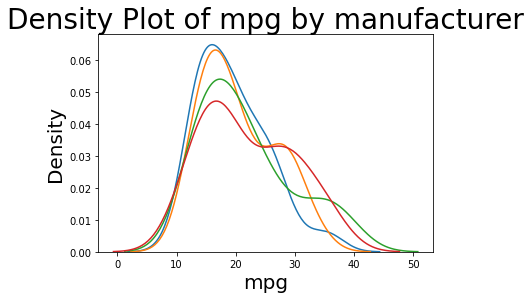

In [ ]:
# Plot each manufacturer
for c_brand in brand:
    # Select the manufacturer
    subset = data[data['manufacturer'] == c_brand]
    
    # Density plot of mpg
    sns.kdeplot(subset['mpg'].dropna(),
               label = c_brand, shade = False, alpha = 0.8);
# label the plot
plt.xlabel('mpg', size = 20)
plt.ylabel('Density', size = 20) 
plt.title('Density Plot of mpg by manufacturer', size = 28)
plt.show()

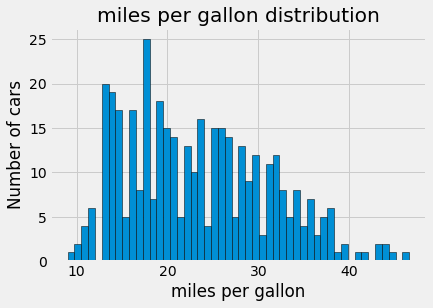

In [ ]:
#figsize(8, 8)
# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data["mpg"].dropna(), bins = 50, edgecolor = 'k');
plt.xlabel('miles per gallon'); plt.ylabel('Number of cars'); 
plt.title('miles per gallon distribution');
plt.show()

**Step-3-Vishualisation**

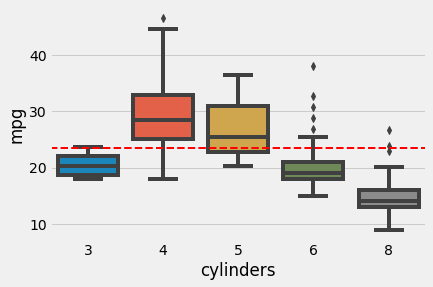

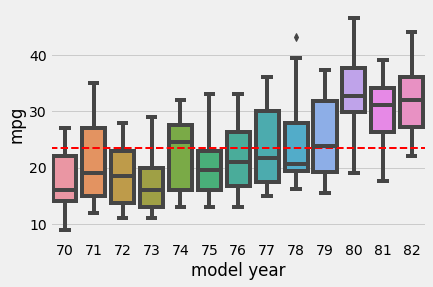

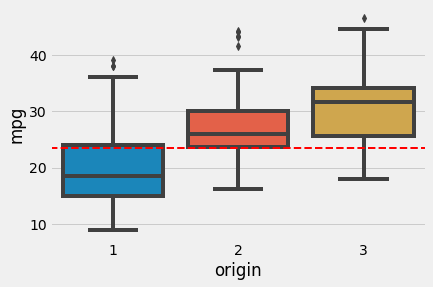

In [ ]:
boxplot_vars = ["cylinders", "model year", "origin"]

for var_i in boxplot_vars:
    temp_df_graph = pd.concat([data["mpg"], data[var_i]], axis=1)
    fig = sns.boxplot(x=var_i, y="mpg", data=temp_df_graph)
    plt.axhline(data["mpg"].mean(),color='r',linestyle='dashed',linewidth=2)
    plt.show()
    #fig.figure.savefig("figs/" + var_i + "_box.png")
del temp_df_graph

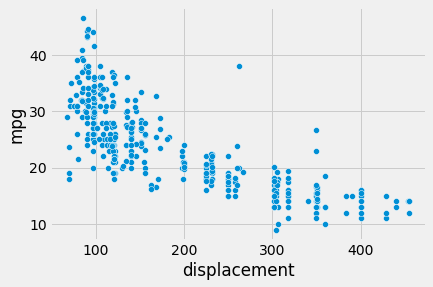

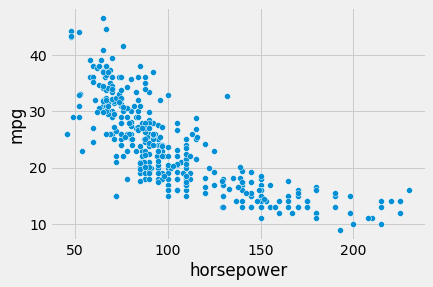

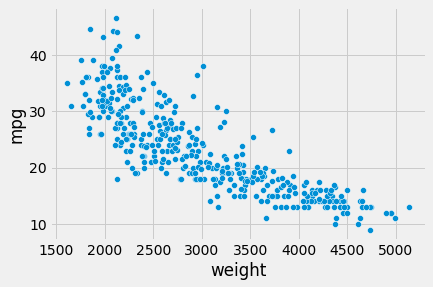

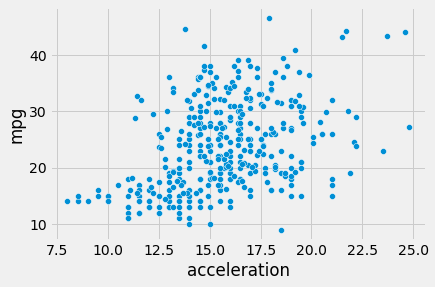

In [ ]:
#TEST ASSUMPTION: LINEARITY
#show scatter plots
scatter_vars = ["displacement", "horsepower", "weight", "acceleration"]
#scatter plots against y
for var_i in scatter_vars:
    fig = sns.scatterplot(x=data[var_i], y=data["mpg"])
    plt.show()
    #fig.figure.savefig("figs/" + var_i + "_scatter.png")

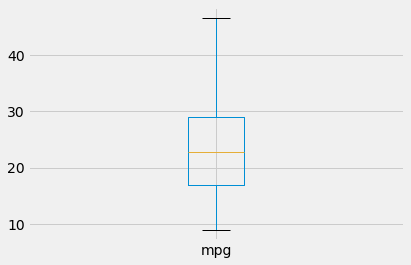

In [ ]:
data['mpg'].plot.box()

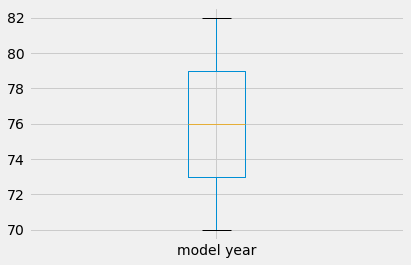

In [ ]:
data['model year'].plot.box()

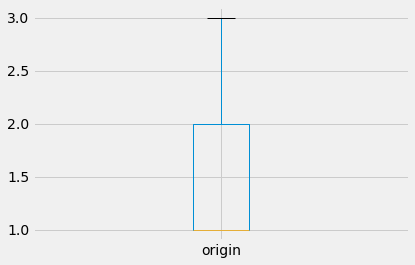

In [ ]:
data['origin'].plot.box()

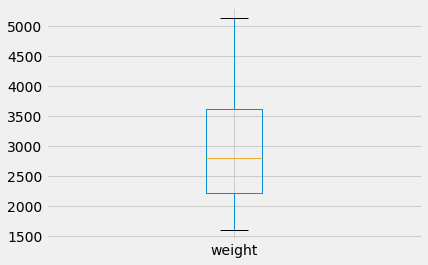

In [ ]:
data['weight'].plot.box()

In [ ]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [ ]:
from scipy.stats import boxcox

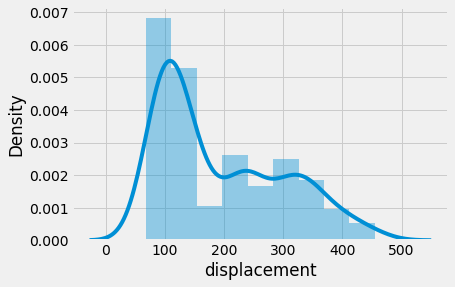

In [ ]:
sns.distplot(data['displacement'])

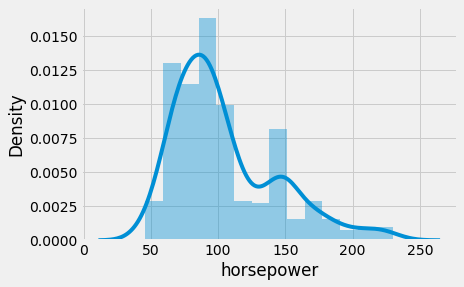

In [ ]:
sns.distplot(data['horsepower'])

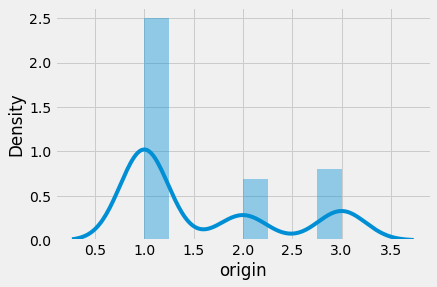

In [ ]:
sns.distplot(data['origin'])

In [ ]:
data['displacement']=boxcox(data['displacement'],0)
data['origin']=boxcox(data['origin'],0)
data['horsepower']=boxcox(data['horsepower'],0)

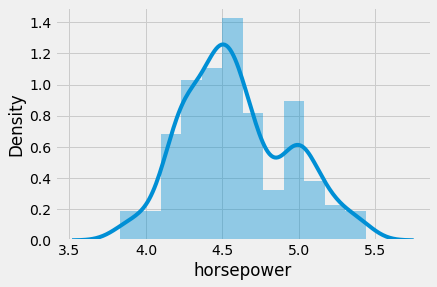

In [ ]:
sns.distplot(data['horsepower'])

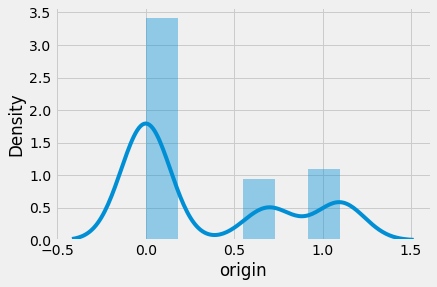

In [ ]:
sns.distplot(data['origin'])

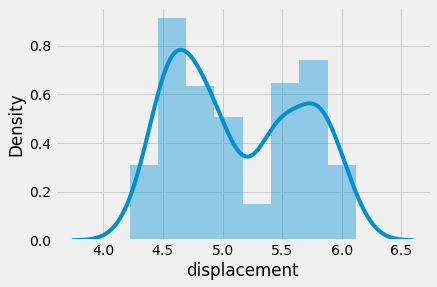

In [ ]:
sns.distplot(data['displacement'])

In [ ]:
data.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.211368
horsepower      0.370148
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.731162
dtype: float64

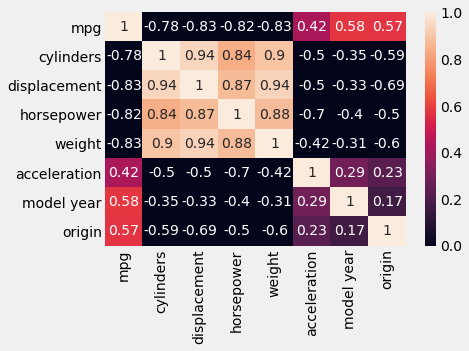

In [ ]:
sns.heatmap(data.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

In [ ]:
x=data[['cylinders','displacement','horsepower','weight','acceleration','origin','model year']].copy()
y=data['mpg']

In [ ]:
x.shape

(392, 7)

In [ ]:
y.shape

(392,)

In [ ]:
y=y.values.reshape(-1,1)

In [ ]:
y.shape

(392, 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

**Step-4-Normalized the Dataset**

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing dataabs
x_test = norm.transform(x_test)

In [ ]:
x_train.shape

(274, 7)

In [ ]:
x_test.shape

(118, 7)

In [ ]:
y_train.shape

(274, 1)

In [ ]:
y_test.shape

(118, 1)

**Step-5-Create the Model**

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(x.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model
model = build_model()
model.summary()
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss',score[0])
print('Test Accurcacy',score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________
Test Loss 566.5582885742188
Test Accurcacy 22.639053344726562


**Step-7-Training the Model**

In [ ]:
EPOCHS = 10
history = model.fit(
  x_train,y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

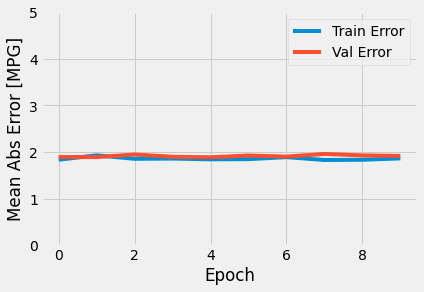

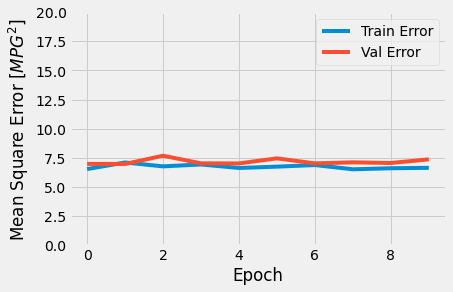

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(x_test,y_test, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.82 MPG


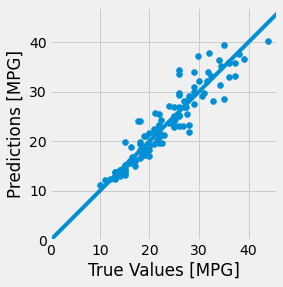

In [ ]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])